# Supervised Learning

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Multi-class classification

In [2]:
data_file = '../data/fruits_multilabel_classification.tsv'
fruits_df = pd.read_table(data_file)
print ('Shape: ', fruits_df.shape)
print ('Unique Fruits: ', fruits_df['fruit_name'].unique())
fruits_df.head(5)

Shape:  (59, 7)
Unique Fruits:  ['apple' 'mandarin' 'orange' 'lemon']


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


### Exploratory Data Analysis (EDA)

In [3]:
## Check whether the data is balanced
print(fruits_df.groupby('fruit_name').size())

fruits_df.describe()

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


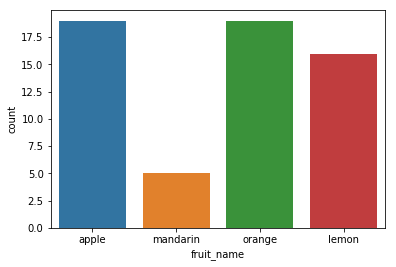

In [4]:
sns.countplot(fruits_df['fruit_name'],label="Count")
plt.show()

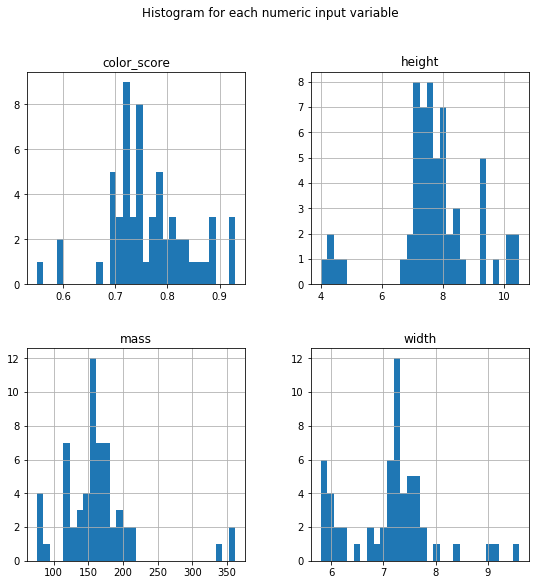

In [5]:
fruits_df.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

### Split Train and Test

In [6]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits_df[feature_names]
y = fruits_df['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print ('\nX_train shape: ', X_train.shape)
print ('y_train shape: ', y_train.shape)

print ('\nX_test shape: ', X_test.shape)
print ('y_test shape: ', y_test.shape)


X_train shape:  (47, 4)
y_train shape:  (47,)

X_test shape:  (12, 4)
y_test shape:  (12,)


### Pre-process
-- `We can see that the numerical values do not have the same scale. We will need to apply scaling to the test set that we computed for the training set`

-- `MinMax estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.`

How to calculate<br>
`X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min`

In [7]:
print ('Before scaling.. ')
print ('Train:\n', X_train.head(3))
print ('Test:\n', X_test.head(3))

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print ('\nAfter scaling.. ')
print ('Train:\n', X_train[0:3])
print ('Test:\n', X_test[0:3])

Before scaling.. 
Train:
     mass  width  height  color_score
30   158    7.1     7.5         0.79
41   180    7.6     8.2         0.79
33   190    7.5     8.1         0.74
Test:
     mass  width  height  color_score
26   362    9.6     9.2         0.74
35   150    7.1     7.9         0.75
43   194    7.2    10.3         0.70

After scaling.. 
Train:
 [[0.29285714 0.38235294 0.53846154 0.64864865]
 [0.37142857 0.52941176 0.64615385 0.64864865]
 [0.40714286 0.5        0.63076923 0.51351351]]
Test:
 [[1.02142857 1.11764706 0.8        0.51351351]
 [0.26428571 0.38235294 0.6        0.54054054]
 [0.42142857 0.41176471 0.96923077 0.40540541]]


### Build Models - Logistic regression

In [8]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy on training set: 0.70
Accuracy on test set: 0.58


### Build Models - Decision Trees

In [9]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.92


### Build Models - KNN

In [10]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy on training set: 0.98
Accuracy on test set: 1.00


### Confusion Matrix

In [11]:
# for logistics regression
pred = logreg.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         4
           2       0.00      0.00      0.00         1
           3       1.00      0.20      0.33         5
           4       0.67      1.00      0.80         2

   micro avg       0.58      0.58      0.58        12
   macro avg       0.54      0.55      0.45        12
weighted avg       0.69      0.58      0.49        12

